## Imports

In [1]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from setup_lookup_table import setup_lookup_table
from create_event_sequence import create_event_sequence
from flood_adapt.objects.forcing.unit_system import UnitTypesLength

## Inputs 
Provide the event set and the range of SLR values to be calculated. 

In [7]:
DATA_DIR = Path(r"c:\Users\winter_ga\Offline_data\FloodAdapt-WorkingDatabase\Charleston\4_FloodAdapt\Database")
site = "charleston_beta_release"
name_event_set = "event_set_coastal"

# scenario input parameters
slr = np.arange(0, 3.1, 1)
unit = UnitTypesLength.feet
fp_height = 2  # floodproof height 

# Monte Carlo input parameters for event sequences
timestep = 1  # timestep of Monte Carlo in years
years = 30  # length of simulation in years
n_seq = 20  # number of event sequences to generate
seed = 42  # random seed for reproducibility

## Create event sequence and look up table

To Do: 
- naming of projections and strategies needs to be more unique to avoid confusion when running a different analysis.

In [ ]:
# Lookup table

ds_impacts = setup_lookup_table(
        DATA_DIR, site, 
        name_event_set, 
        slr=np.arange(0, 3.1, 1), 
        unit = "feet", 
        fp_height = 2, 
        timestep=1, 
        run_scenarios=False)


In [ ]:

# Event sequence
fn_event_set = DATA_DIR / site / "input" / "events" / name_event_set / f"{name_event_set}.toml"

[occ, sequences, event_names, probs] = create_event_sequence(
        fn_event_set,   
        years=years, 
        n_seq=n_seq, 
        dt=timestep,
        seed=seed)

## Plot event sequences

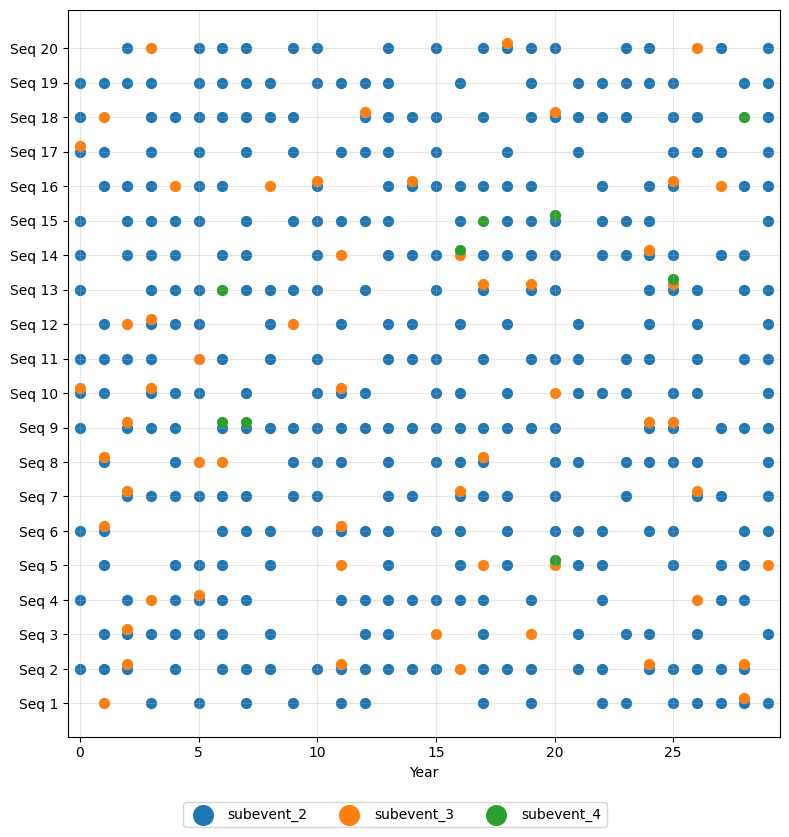

In [11]:

# Create figure with 1 row, 3 columns
fig, axes = plt.subplots(1,1, figsize=(8,8))
seq_max = 20

# Color map for events
colors = {event_id: plt.cm.tab10(i) for i, event_id in enumerate(event_names)}
yticklabels = []
# Plot first seq_max sequences
for seq_idx in range(min(seq_max, len(sequences))):
    ax = axes#[seq_idx]
    
    # For each year, plot events stacked vertically
    for year_idx, year_events in enumerate(sequences[seq_idx]):
        for marker_offset, event_id in enumerate(sorted(year_events)):
            ax.scatter(year_idx, marker_offset*0.15+seq_idx, 
                      color=colors[event_id], 
                      s=50, 
                      marker='o',
                      label=event_id if year_idx == 0 else "")
    yticklabels.append(f"Seq {seq_idx+1}")
    
ax.set_xlabel('Year')
ax.set_yticks([i for i in range(min(seq_max, len(sequences)))])
ax.set_yticklabels(yticklabels)
# ax.set_title(f'Sequence {seq_idx}')
ax.set_xlim(-0.5, years - 0.5)
# ax.set_ylim(-0.1, 1)
ax.grid(True, alpha=0.3)
ax.set_xticks(range(0, years, 5))

# Add legend (use unique events)
handles = [plt.scatter([], [], color=colors[e], s=200, marker='o') for e in event_names]
fig.legend(handles, event_names, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=len(event_names))

plt.tight_layout()
plt.show()

fig.savefig('event_sequences.png', bbox_inches='tight')

## Step 6: Plot impacts for event sequences

To Do: 
- load SLR projection
- interpolate impacts to SLR in each year. How? Ceil? Flood? Linear?

In [ ]:
ds_impacts["total_damage"].isel(slr=0,strategy=0).sum()

<xarray.DataArray 'total_damage' ()> Size: 8B
array(5640824.)
Coordinates:
    slr       float64 8B 0.0
    strategy  <U14 56B 'no_measures'